In [52]:
#Librerías que utilizaré 
#Web scraping
import requests
from bs4 import BeautifulSoup #sirve para hacer web scraping
import pandas as pd
#Limpieza de texto 
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


In [53]:
import nltk
from nltk.probability import FreqDist
#nltk.download('punkt')

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


# Web scraping

In [55]:
#Web scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [56]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft at Heathrow. It seems like this is standard for the Berlin flights. Would use again.
1,✅ Trip Verified | Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow.
2,"✅ Trip Verified | My flight on on 12 May 2023 got delayed an hour and 25 minutes which resulted in the cancellation of our connection flight on 12 May 2023 as the arrival of the first flight was only 15 before the departure of the second connecting flight. We contacted the BA call center multiple times to make changes to the flight in order to still arrive on the 12th of May to KEF airport through different flights. The team tried to find a solution but none made sense, not even on the next day the 13th of May 2023. We have made full booking of accommodation, car rental, activities etc for the vacation in Iceland. The cancellation of of these booking is not refundable. The call center suggested that we cancel the flight for a full refund, then claim compensation for the delay and difference in airfare cost and other non refundable bookings due to the delay and cancellation of our flight. British Airways responded to the claim after a month with no compensation at all, even though we paid additional $600 on new bookings and additional charges. The refund of the cancelled flight took more than a month with multiple calla to follow up almost every week. I was promised to get refund on the first call but later I found out it was not processed properly. Every-time I call the agent ask questions about why flight was canceled etc which is annoying when my understanding everything was under process for payment. After multiple calls I was refunded partially and not the full amount which is even bizarre from a company of this level. I had to make more calls to get the remaining balance refunded. The whole experience was terrible."
3,"Not Verified | Cairo is a 5 hour flight and BA considers it to be short haul, so everyone is crammed in with knees pressed up against the seat in front and nothing in the way of inflight entertainment. Not even a magazine - which is now available by WiFi that you have to pay for. You have to pay for your seat choice, checked in baggage, food & drink, WiFi. Not that I have anything against that - I'm used to that on budget airlines - but this is for a premium price ticket. I would have preferred to fly on easyJet where the initial ticket would have been less, and the extras would have been half the price. The BA app and website makes it really difficult to understand the extras and we ended up with baggage on the wrong ticket so had to pay extra. And don't get me started on their customer service helpline. On board the staff are ok but on the long Cairo-London route they spend most of their time on a break where they use the back row or two and talk loudly without any consideration for the passengers. And for the flyers who don't want the hassle of charges, minimal cabin service, and budget seats, then they could easily provide a 'premium economy' option and really make a difference for the experience. Heathrow Terminal 5 compounds the poor experience, especially for arrivals. It is also poorly served by transport links - especially for those of us who live near Gatwick which is being abandoned by BA. I have been a frequent flyer for many years - and was even a BA Gold Card holder at one point - so I know about the potential experience. I used be able to make the choice - do I fly budget, or do I fly more comfortably for more? Now it's a case of flying budget, or flying budget for double the price with BA."
4,"✅ Trip Verified | After travelling London to Madrid with British Airways, then with Iberia from 

# Limpieza de texto 

In [57]:

def clean_text(review):
    # Eliminar caracteres especiales y puntuación. Me quedaré con un reviews con letras, numeros y espacios 
    review = re.sub(r'[^\w\s]', '', review)
    
    # Convertir a minúsculas
    review = review.lower()
    
    # Eliminar palabras vacías (stop words)
    stop_words = set(stopwords.words('english'))  # Puedes utilizar el idioma que corresponda
    review = ' '.join(word for word in review.split() if word not in stop_words)
    #Palabras con más de tres letras 
    review = " ".join(word for word in review.split() if len(word) > 2)

    
    return review



# Aplicar la limpieza de texto a la columna "reviews"
df['reviews'] = df['reviews'].apply(clean_text)


In [58]:
# Reemplazar "trip verified" por una cadena vacía en la columna "reviews"
df['reviews'] = df['reviews'].str.replace('trip verified', '')

# Reemplazar "verified trip" por una cadena vacía en la columna "reviews"
df['reviews'] = df['reviews'].str.replace('verified trip', '')
df['reviews'] = df['reviews'].str.replace('verified review', '')
df['reviews'] = df['reviews'].str.replace('flight', '')
df['reviews'] = df['reviews'].str.replace('fly', '')


In [59]:
pd.set_option('display.max_rows',20) #Cantidad de filas a mostrar 
pd.set_option('display.max_colwidth', None) #Que tan larga es cada celda

In [60]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()


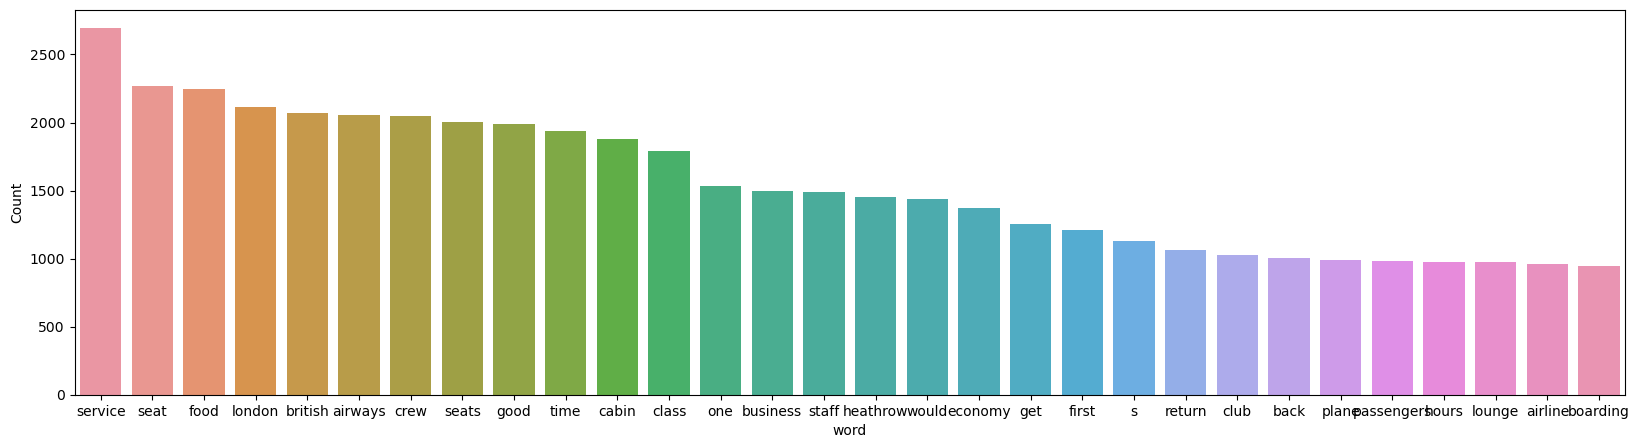

In [61]:
freq_words(df['reviews'])

In [11]:
#!python -m spacy download en # one time run
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en


In [12]:
#!python -m spacy info
#!pip install --upgrade spacy
#!python -m spacy download en_core_web_sm


In [13]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [62]:
import spacy

In [63]:
nlp = spacy.load('en_core_web_sm')


In [126]:
#Funcion que va a lematizar a tokens 
def lemmatization(texts, tags=[ 'NOUN',"ADJ"]): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [130]:
tokenized_reviews = pd.Series(df['reviews']).apply(lambda x: x.split())
tokenized_reviews

0                                                                                                                                                       [fine, pleasant, standard]
1                                                                                                                                                                          [third]
2                     [different, next, full, refundable, full, refundable, due, additional, new, additional, multiple, first, annoying, multiple, full, bizarre, whole, terrible]
3                                                              [short, available, initial, difficult, wrong, extra, long, minimal, premium, poor, frequent, many, potential, able]
4                                                                                                                                                                      [open, 1st]
                                                                                           ...           

In [128]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['third']


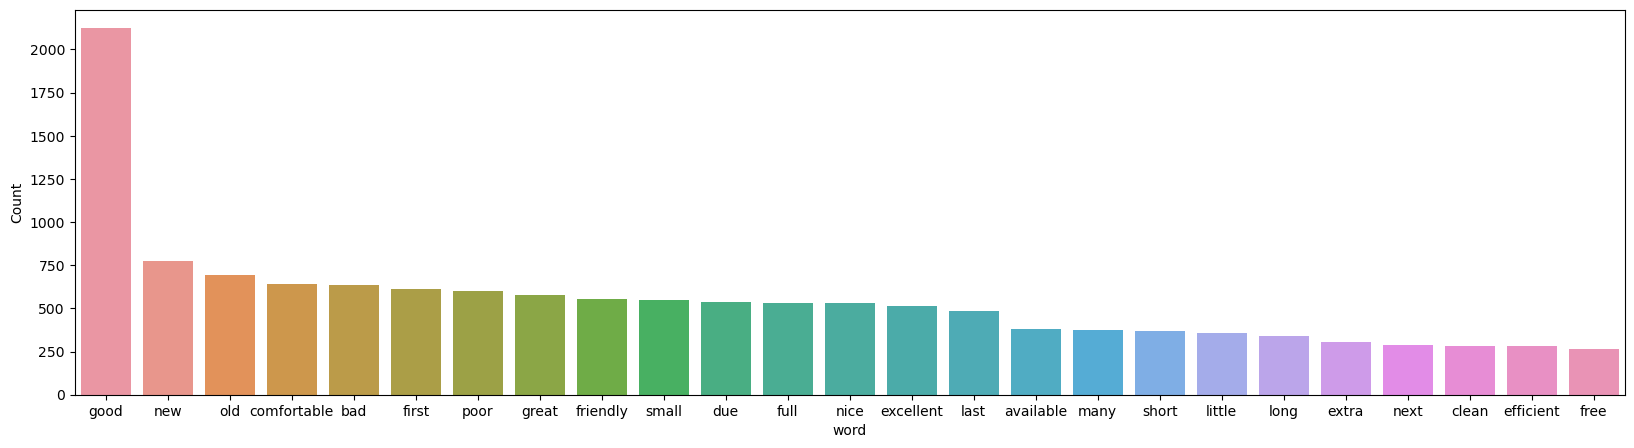

In [129]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 25)

# Realizar un modelo LDA
It is a generative probabilistic model that assumes each topic is a mixture over and underlying set of words. 

Un tema está compuesto de un set de palabras 
Un documento está compuesto de un set de temas

#### Parametros del modelo
alpha: document-topic density. A más alpha, los documentos se asumen que están compuestos de más temas. Habrá una distribución más específica de temas por documento

beta: A más beta, se asume que los temas están compuestos por la mayoría de las palabras. 

# Wordcloud

/Users/angelgonzalez29/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


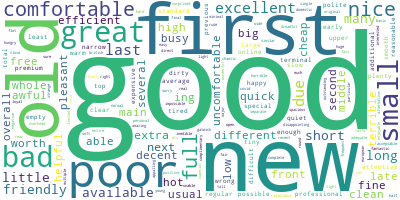

In [93]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['reviews'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
wordcloud.to_image()

# Modelo LDA

In [109]:
#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

1. Preparar datos
2. Limpieza de texto
3. Representación del texto
- Bag of Words
- TF-IDF
- Matriz Document-Term

4. Creación del modelo LDA
5. Visualización y representación

### Bag of words
Representa textos de forma numérica. Cada documento es un saco de palabras sin importar el orden. 
1. Tokenizar: Cada documento se divide en cada elemento que exista como las palabras
2. 

In [110]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia del vectorizador BoW
vectorizer = CountVectorizer()

# Aplicar el vectorizador a tus reseñas
bow_matrix = vectorizer.fit_transform(df['reviews'])  # Reemplaza "df['reviews']" con tu columna de reseñas

# Obtener la matriz BoW como una matriz numpy
bow_matrix = bow_matrix.toarray()

# Ver las dimensiones de la matriz BoW
print("Dimensiones de la matriz BoW:", bow_matrix.shape)

# Ver el vocabulario (términos) utilizado en la matriz BoW.
#Basicmanete todas las pabaras que hay. 
vocabulario = vectorizer.get_feature_names_out()
print("Vocabulario:", vocabulario[:10])  # Muestra los primeros 10 términos del vocabulario


Dimensiones de la matriz BoW: (3500, 2404)
Vocabulario: ['1000am' '1010pm' '1015pm' '10ab' '10hr' '10hrs' '10th' '1125pm'
 '1130ish' '1130pm']


Las dimensiones de la matriz indican que tengo 2000 reseñas y 7245 términos. La matriz indica la cantidad de veces que se repite un término en un documento. 

In [111]:
from sklearn.decomposition import LatentDirichletAllocation

# Crear una instancia del modelo LDA
num_topics = 4  # Especifica el número de temas que deseas encontrar
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Entrenar el modelo LDA
lda_model.fit(bow_matrix)

# Obtener los términos más relevantes de cada tema
num_top_words = 10  # Especifica el número de palabras más relevantes por tema
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-num_top_words - 1:-1]
    top_features = [vocabulario[i] for i in top_features_ind]
    print(f"Top palabras del tema {topic_idx + 1}:")
    print(top_features)



Top palabras del tema 1:
['friendly', 'great', 'helpful', 'good', 'nice', 'comfortable', 'professional', 'due', 'clean', 'pleasant']
Top palabras del tema 2:
['due', 'last', 'free', 'full', 'available', 'bad', 'late', 'next', 'many', 'low']
Top palabras del tema 3:
['bad', 'poor', 'new', 'old', 'first', 'uncomfortable', 'small', 'extra', 'next', 'many']
Top palabras del tema 4:
['good', 'comfortable', 'excellent', 'new', 'old', 'first', 'nice', 'full', 'friendly', 'great']


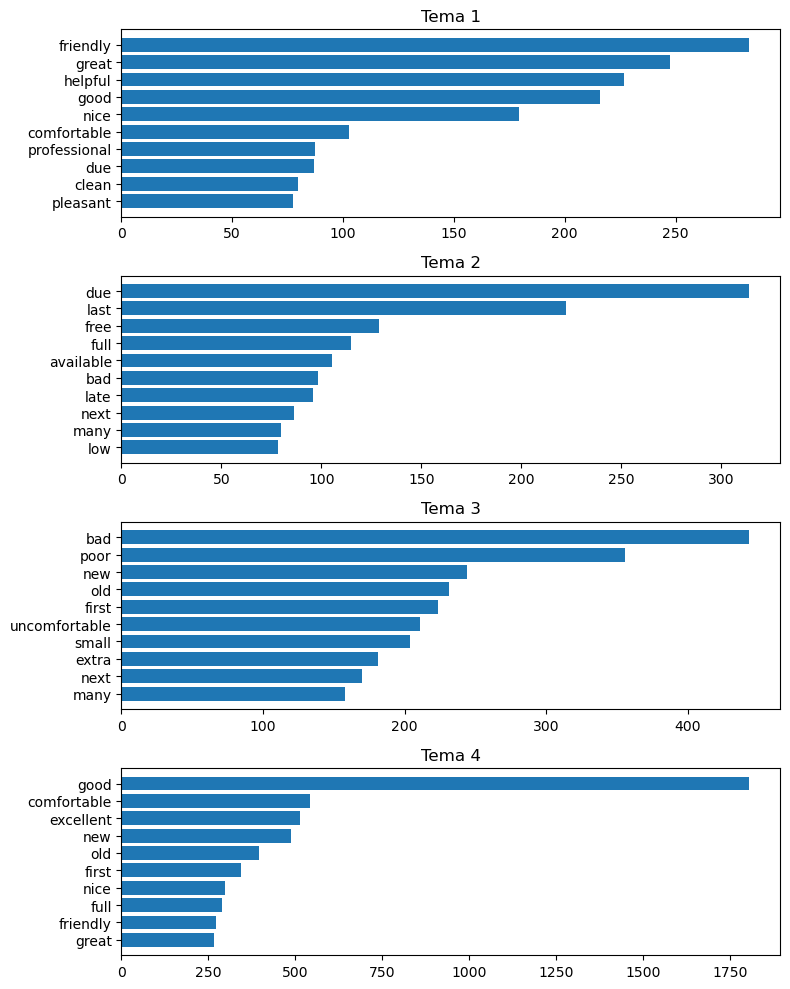

In [112]:
import matplotlib.pyplot as plt

num_top_words = 10
fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(8, 10))

for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-num_top_words - 1:-1]
    top_features = [vocabulario[i] for i in top_features_ind]
    ax = axes[topic_idx]
    ax.barh(range(num_top_words), topic[top_features_ind], align='center')
    ax.set_yticks(range(num_top_words))
    ax.set_yticklabels(top_features)
    ax.invert_yaxis() 
    ax.set_title(f"Tema {topic_idx + 1}")

plt.tight_layout()
plt.show() 


In [113]:
import gensim.corpora as corpora
from gensim import models

# Crear una lista de listas de palabras
texts = [doc.split() for doc in df['reviews']]

# Crear el diccionario
id2word = corpora.Dictionary(texts)

# Crear el corpus
corpus = [id2word.doc2bow(text) for text in texts]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)



In [114]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

# Preparar los datos para visualización con pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Visualizar el Intertopic Distance Map2
pyLDAvis.display(vis_data)


In [115]:
from gensim.models import CoherenceModel

# Calcular el Coherence Score
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Imprimir el Coherence Score
print(f"Coherence Score: {coherence_score}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


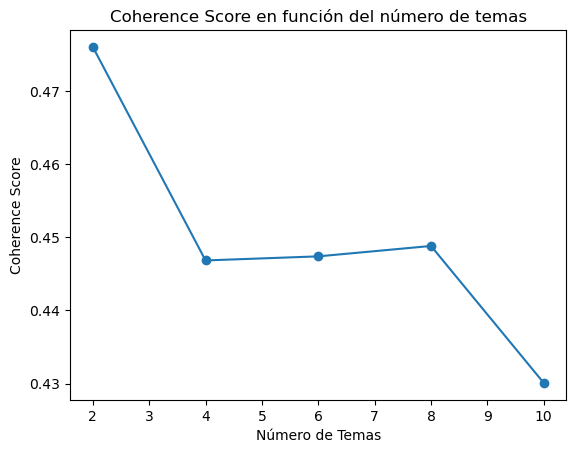

In [116]:
import matplotlib.pyplot as plt

# Lista para almacenar los Coherence Scores
coherence_scores = []

# Lista de posibles números de temas
num_topics_list = [2, 4, 6, 8, 10]

# Calcular el Coherence Score para cada número de temas
for num_topics in num_topics_list:
    lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Graficar los resultados
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel('Número de Temas')
plt.ylabel('Coherence Score')
plt.title('Coherence Score en función del número de temas')
plt.show()


# Sentiment Analysis

In [78]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
#nltk.download('vader_lexicon')


In [117]:
sia = SentimentIntensityAnalyzer()
for review in df['reviews']:
    sentiment = sia.polarity_scores(review)
    print(sentiment)


{'neg': 0.0, 'neu': 0.164, 'pos': 0.836, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.7964}
{'neg': 0.442, 'neu': 0.558, 'pos': 0.0, 'compound': -0.8271}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.09, 'neu': 0.597, 'pos': 0.313, 'compound': 0.7184}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.34, 'pos': 0.66, 'compound': 0.9274}
{'neg': 0.821, 'neu': 0.179, 'pos': 0.0, 'compound': -0.8481}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.232, 'neu': 0.24, 'pos': 0.528, 'compound': 0.5719}
{'neg': 0.176, 'neu': 0.203, 'pos': 0.622, 'compound': 0.765}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.726, 'neu': 0.274, 'pos': 0.0, 'compound': -0.6486}
{'neg'

{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'compound': 0.7579}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.221, 'neu': 0.571, 'pos': 0.207, 'compound': -0.0516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.144, 'pos': 0.856, 'compound': 0.9169}
{'neg': 0.175, 'neu': 0.514, 'pos': 0.312, 'compound': 0.6124}
{'neg': 0.138, 'neu': 0.486, 'pos': 0.377, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.872}
{'neg': 0.0, 'neu': 0.06, 'pos': 0.94, 'compound': 0.9403}
{'neg': 0.0, 'neu': 0.184, 'pos': 0.816, 'compound': 0.9766}
{'neg': 0.0, 'neu': 0.189, 'pos': 0.811, 'compound': 0.8225}
{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.067, 'neu': 0.207, 'pos': 0.726, 'compound': 0.9811}
{'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'compound': 0.7269}
{'neg': 0.0, 'neu': 0.422, 'pos': 0.578, 'compound': 0.8625}
{'neg': 0.0, 'neu': 0.163, 'pos': 0.837, 'compound': 0.8834}
{'neg': 0.514, 'neu': 0.276, 'p

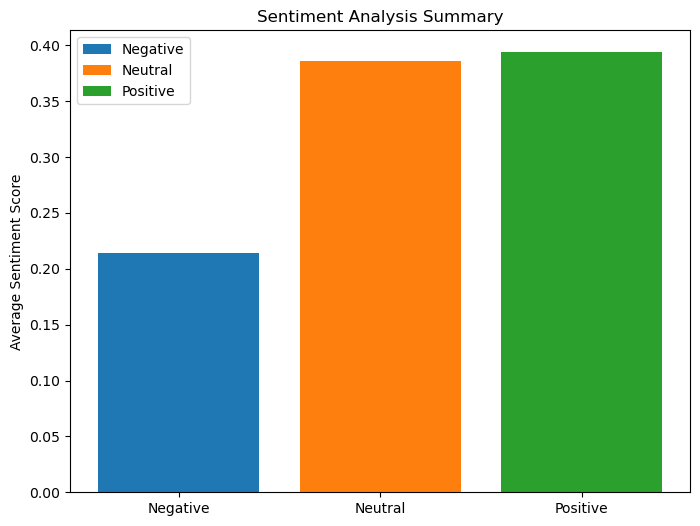

In [118]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Crear una instancia del SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calcular los puntajes de sentimiento para cada review
sentiment_scores = [sia.polarity_scores(review) for review in df['reviews']]

# Calcular los puntajes promedio para cada categoría de sentimiento
avg_neg_score = np.mean([score['neg'] for score in sentiment_scores])
avg_neu_score = np.mean([score['neu'] for score in sentiment_scores])
avg_pos_score = np.mean([score['pos'] for score in sentiment_scores])
avg_compound_score = np.mean([score['compound'] for score in sentiment_scores])

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los puntajes promedio de sentimiento
ax.bar('Negative', avg_neg_score, label='Negative')
ax.bar('Neutral', avg_neu_score, label='Neutral')
ax.bar('Positive', avg_pos_score, label='Positive')
#ax.bar('Compound', avg_compound_score, label='Compound')

# Configuraciones adicionales del gráfico
ax.set_ylabel('Average Sentiment Score')
ax.set_title('Sentiment Analysis Summary')
ax.legend()

# Mostrar el gráfico
plt.show()


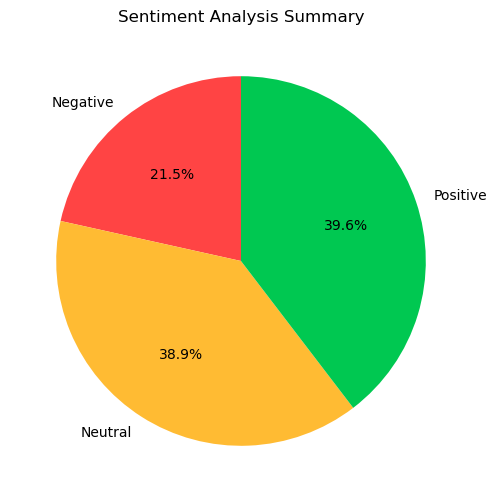

In [119]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment scores for each review
sentiment_scores = [sia.polarity_scores(review) for review in df['reviews']]

# Calculate the average scores for each sentiment category
avg_neg_score = np.mean([score['neg'] for score in sentiment_scores])
avg_neu_score = np.mean([score['neu'] for score in sentiment_scores])
avg_pos_score = np.mean([score['pos'] for score in sentiment_scores])
avg_compound_score = np.mean([score['compound'] for score in sentiment_scores])

# Pie chart data
labels = ['Negative', 'Neutral', 'Positive']
sizes = [avg_neg_score, avg_neu_score, avg_pos_score]
colors = ['#FF4444', '#FFBB33', '#00C851']  # Custom colors for each sentiment category

# Configure the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Additional configurations
ax.set_title('Sentiment Analysis Summary')

# Show the pie chart
plt.show()


In [120]:
print(avg_neg_score)
print(avg_neu_score)
print(avg_pos_score)

0.213956
0.38629771428571424
0.39375571428571426


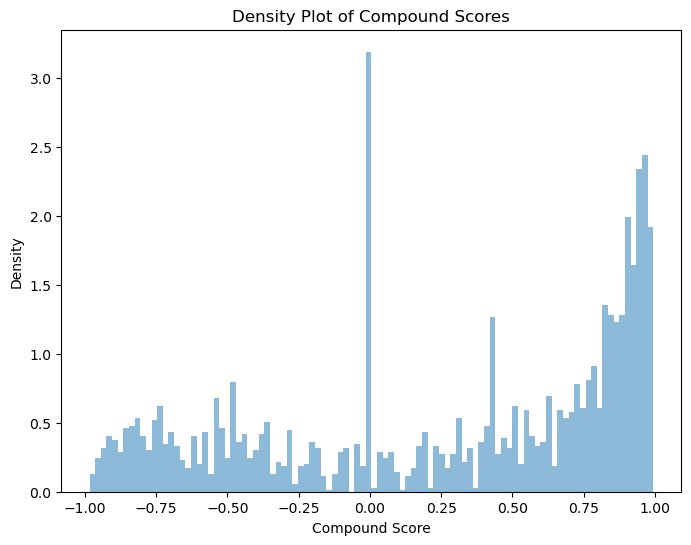

In [121]:
import matplotlib.pyplot as plt

# Obtener los valores de "compound"
compound_scores = [score['compound'] for score in sentiment_scores]

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el histograma de "compound"
ax.hist(compound_scores, bins=100, density=True, alpha=0.5)

# Configuraciones adicionales del gráfico
ax.set_xlabel('Compound Score')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Compound Scores')

# Mostrar el gráfico
plt.show()


# Negative reviews

In [122]:
df_sentiment = pd.DataFrame(sentiment_scores)
df_negatives = df[df_sentiment['compound'] < 0]


/Users/angelgonzalez29/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


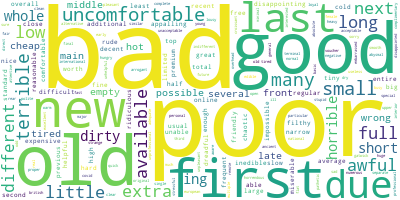

In [123]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_negatives["reviews"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
wordcloud.to_image()


In [124]:
import gensim.corpora as corpora
from gensim import models

# Crear una lista de listas de palabras
texts = [doc.split() for doc in df_negatives["reviews"]]

# Crear el diccionario
id2word = corpora.Dictionary(texts)

# Crear el corpus
corpus = [id2word.doc2bow(text) for text in texts]

# Entrenar el modelo LDA
lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

# Preparar los datos para visualización con pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Visualizar el Intertopic Distance Map2
pyLDAvis.display(vis_data) 



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


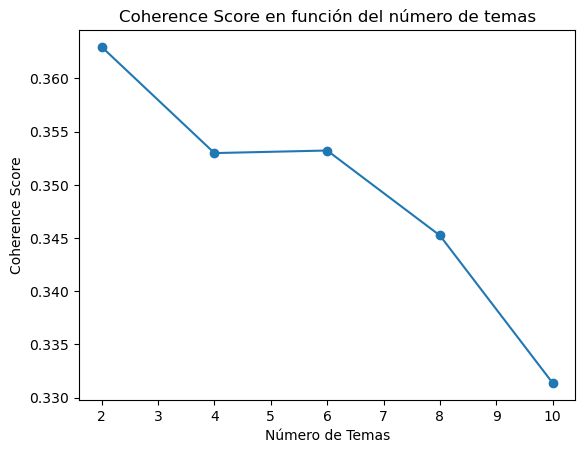

In [125]:
import matplotlib.pyplot as plt

# Lista para almacenar los CoherenEn las sigueinte lineas de espera estan ecnotnrado ce Scores
coherence_scores = []

# Lista de posibles números de temas
num_topics_list = [2, 4, 6, 8, 10]

# Calcular el Coherence Score para cada número de temas
for num_topics in num_topics_list:
    lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Graficar los resultados
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel('Número de Temas')
plt.ylabel('Coherence Score')
plt.title('Coherence Score en función del número de temas')
plt.show()
